### **3.1**  试分析什么情形下式3.2中不必考虑偏置项b

式3.2 f(x)=ωTx+b 中，ωT 和b有各自的意义，简单来说，ωT 决定学习得到模型(直线、平面)的方向，而b则决定截距，当学习得到的模型恰好经过原点时，可以不考虑偏置项b。偏置项b实质上就是体现拟合模型整体上的浮动，可以看做是其它变量留下的偏差的线性修正，因此一般情况下是需要考虑偏置项的。但如果对数据集进行了归一化处理，即对目标变量减去均值向量，此时就不需要考虑偏置项了。

### **3.2** 试证明，对于参数w，对率回归的目标函数(3.18)式非凸的，但其对树似然函数(3.27)式凸的


对区间[a,b]上定义的函数f(x)，若它对区间中任意两点x1，x2均有f(x1+x22)≤f(x1)+f(x2)2，则称f(x)为区间[a,b]上的凸函数。对于实数集上的函数，可通过二阶导数来判断：若二阶导数在区间上非负，则称为凸函数，在区间上恒大于零，则称为严格凸函数。

对于式3.18 y=11+e−(ωTx+b)，有

dy/dωT=1(1+e−(ωTx+b))2e−(ωTx+b)(−x)=(−x)11+e−(ωTx+b)(1−11+e−(ωTx+b))=xy(y−1)=x(y2−y)

d/dωT(dy/dωT)=x(2y−1)(dy/dωT)=x2y(2y−1)(y−1)

其中，y的取值范围是(0,1)，不难看出二阶导有正有负，所以该函数非凸

### **3.3** 编程实现对率回归并给出西瓜数据集3.0a上的结果

![西瓜](https://img2018.cnblogs.com/blog/1647944/201904/1647944-20190414154709340-1182795231.png)

```
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
dataset = pd.read_csv('/home/zwt/Desktop/watermelon3a.csv')
#数据预处理
X = dataset[['密度','含糖率']]
Y = dataset['好瓜']
good_melon = dataset[dataset['好瓜'] == 1]
bad_melon = dataset[dataset['好瓜'] == 0]
#画图
f1 = plt.figure(1)
plt.title('watermelon_3a')
plt.xlabel('density')
plt.ylabel('radio_sugar')
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(bad_melon['密度'],bad_melon['含糖率'],marker='o',color='r',s=100,label='bad')
plt.scatter(good_melon['密度'],good_melon['含糖率'],marker='o',color='g',s=100,label='good')
plt.legend(loc='upper right')
#分割训练集和验证集
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.5,random_state=0)
#训练
log_model = LogisticRegression()
log_model.fit(X_train,Y_train)
#验证
Y_pred = log_model.predict(X_test)
#汇总
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.classification_report(Y_test, Y_pred, target_names=['Bad','Good']))
print(log_model.coef_)
theta1, theta2 = log_model.coef_[0][0], log_model.coef_[0][1]
X_pred = np.linspace(0,1,100)
line_pred = theta1 + theta2 * X_pred
plt.plot(X_pred, line_pred)
plt.show()
```

![结果](https://img2018.cnblogs.com/blog/1647944/201904/1647944-20190414155110806-273826402.png)

state|precision|recal|f1-score|support
:--|--|:--:|:--:|--
Bad|0.75 | 0.60|0.67|5
Good  | 0.60| 0.75  |    0.67       |  4
micro avg |0.67 |  0.67  |    0.67   |    9
macro avg|0.68 |   0.68      |0.67      |   9
weighted avg     |  0.68    |  0.67  |    0.67|    9

### **3.4** 选择两个ucl数据集，比较１０折交叉验证法和留一法锁估计出的对率回归的错误率

In [7]:
fr = open('winequality-red.csv','r',encoding='utf-8')
fw = open('winequality-red_new.csv','w',encoding='utf-8')
f = fr.readlines()
for line in f:
    line = line.replace(';',',')
    fw.write(line)
fr.close()
fw.close()

In [17]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('max_colwidth',200)
pd.set_option('expand_frame_repr', False)
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

dataset = pd.read_csv('winequality-red_new.csv')
#数据预处理
dataset['quality2'] = dataset['quality'].apply(lambda x: 0 if x < 5 else 1)    #新加入二分类变量是否为好酒，基于原数据中quality的值，其大于等于5就定义为好酒，反之坏酒
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
Y = dataset["quality2"]
#分割训练集和验证集
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.5,random_state=0)
#训练
log_model = LogisticRegression()
log_model.fit(X_train,Y_train)
#验证
Y_pred = log_model.predict(X_test)
#汇总
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.classification_report(Y_test, Y_pred))
print(log_model.coef_)

[[  1  30]
 [  0 769]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        31
           1       0.96      1.00      0.98       769

    accuracy                           0.96       800
   macro avg       0.98      0.52      0.52       800
weighted avg       0.96      0.96      0.95       800

[[ 0.05601887 -2.99083406  0.20665413 -0.02528549 -0.50099649 -0.03814069
   0.02600203  0.25947634 -0.34130211  0.14370906  0.44683548]]


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.datasets import load_wine

# 载入wine数据
dataset = load_wine()
#10次10折交叉验证法生成训练集和测试集
def tenfolds():
    k = 0
    truth = 0
    while k < 10:
        kf = model_selection.KFold(n_splits=10, random_state=None, shuffle=True) ## x_train:x_test=9:1　
        for x_train_index, x_test_index in kf.split(dataset.data):
            x_train = dataset.data[x_train_index]
            y_train = dataset.target[x_train_index]
            x_test = dataset.data[x_test_index]
            y_test = dataset.target[x_test_index]

        # 用对率回归进行训练，拟合数据
        log_model = LogisticRegression()
        log_model.fit(x_train, y_train)
        # 用训练好的模型预测
        y_pred = log_model.predict(x_test)
        for i in range(len(x_test)):         #这里和留一法不同，是因为10折交叉验证的验证集是len(dataset.target)/10，验证集的预测集也是，都是一个列表，是一串数字，而留一法是一个数字
            if y_pred[i] == y_test[i]:
                truth += 1
        k += 1
    # 计算精度
    accuracy = truth/(len(x_train)+len(x_test))  #accuracy = truth/len(dataset.target)
    print("用10次10折交叉验证对率回归的精度是：", accuracy)
tenfolds()
#留一法
def leaveone():  ##每次从数据集中拿出１例作为测试集　共测试len(dataset.target)次
    loo = model_selection.LeaveOneOut()
    i = 0
    true = 0
    while i < len(dataset.target):   
        for x_train_index, x_test_index in loo.split(dataset.data):
            x_train = dataset.data[x_train_index]
            y_train = dataset.target[x_train_index]
            x_test = dataset.data[x_test_index]
            y_test = dataset.target[x_test_index]

        # 用对率回归进行训练，拟合数据
        log_model = LogisticRegression()
        log_model.fit(x_train, y_train)
        # 用训练好的模型预测
        y_pred = log_model.predict(x_test)
        if y_pred == y_test:
            true += 1
        i += 1
    # 计算精度
    accuracy = true / len(dataset.target)
    print("用留一法验证对率回归的精度是：", accuracy)
leaveone()

用10次10折交叉验证对率回归的精度是： 0.9044943820224719
用留一法验证对率回归的精度是： 1.0


### ***3.5** 编程实现线性分别分析,并给出西瓜数据集3.0a上的结果


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
from sklearn import metrics

dataset = pd.read_csv('/home/zwt/Desktop/watermelon3a.csv')
#数据预处理
X = dataset[['密度','含糖率']]
Y = dataset['好瓜']
#分割训练集和验证集
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.5,random_state=0)
#训练
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train,Y_train)
#验证
Y_pred = LDA_model.predict(X_test)
#汇总
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.classification_report(Y_test, Y_pred, target_names=['Bad','Good']))
print(LDA_model.coef_)
#画图
good_melon = dataset[dataset['好瓜'] == 1]
bad_melon = dataset[dataset['好瓜'] == 0]
plt.scatter(bad_melon['密度'],bad_melon['含糖率'],marker='o',color='r',s=100,label='bad')
plt.scatter(good_melon['密度'],good_melon['含糖率'],marker='o',color='g',s=100,label='good')
```

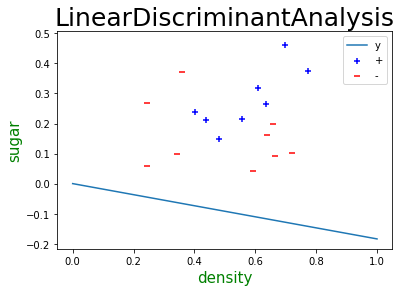

In [29]:
import numpy as np
import matplotlib.pyplot as plt
data = [[0.697, 0.460, 1],
        [0.774, 0.376, 1],
        [0.634, 0.264, 1],
        [0.608, 0.318, 1],
        [0.556, 0.215, 1],
        [0.403, 0.237, 1],
        [0.481, 0.149, 1],
        [0.437, 0.211, 1],
        [0.666, 0.091, 0],
        [0.243, 0.267, 0],
        [0.245, 0.057, 0],
        [0.343, 0.099, 0],
        [0.639, 0.161, 0],
        [0.657, 0.198, 0],
        [0.360, 0.370, 0],
        [0.593, 0.042, 0],
        [0.719, 0.103, 0]]
#数据集按瓜好坏分类
data = np.array([i[:-1] for i in data])
X0 = np.array(data[:8])
X1 = np.array(data[8:])
#求正反例均值
miu0 = np.mean(X0, axis=0).reshape((-1, 1))
miu1 = np.mean(X1, axis=0).reshape((-1, 1))
#求协方差
cov0 = np.cov(X0, rowvar=False)
cov1 = np.cov(X1, rowvar=False)
#求出w
S_w = np.mat(cov0 + cov1)
Omiga = S_w.I * (miu0 - miu1)
#画出点、直线
plt.scatter(X0[:, 0], X0[:, 1], c='b', label='+', marker = '+')
plt.scatter(X1[:, 0], X1[:, 1], c='r', label='-', marker = '_')
plt.plot([0, 1], [0, -Omiga[0] / Omiga[1]], label='y')
plt.xlabel('density',  fontsize=15, color='green');
plt.ylabel('sugar', fontsize=15, color='green');
plt.title(r'LinearDiscriminantAnalysis', fontproperties='SimHei', fontsize=25);
plt.legend()
plt.show()

### ***3.6***  线性判别在线性可分数据上能获得理想结果，试设计一个改进方法，使其能较好地用于非线性可分数据

对于非线性可分的数据，要想使用判别分析，一般思想是将其映射到更高维的空间上，使它在高维空间上线性可分进一步使用判别分析。

### ***3.8***  ECOC编码能够起到理想纠错作用的重要条件是:在每一位编码上出错的概率相当且独立．试分析多分类任务经ECOC编码后产生的二分类器满足该条件的可能性及由此产生的影响

理论上的(纠错输出码)ECOC码能理想纠错的重要条件是每个码位出错的概率相当，因为如果某个码位的错误率很高，会导致这位始终保持相同的结果，不再有分类作用，这就相当于全0或者全 1的分类器。

### ***3.9***  使用OVR和MvM将多分类任务分解为二分类任务求解时，试述为何无需专门针对类别不平衡性进行处理

书中提到，对于OvR，MvM来说，由于对每个类进行了相同的处理，其拆解出的二分类任务中类别不平衡的影响会相互抵消，因此通常不需要专门处理。以ECOC编码为例，每个生成的二分类器会将所有样本分成较为均衡的二类，使类别不平衡的影响减小。当然拆解后仍然可能出现明显的类别不平衡现象，比如一个超级大类和一群小类。